In [1]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import numpy as np

In [2]:
#  Import and read the flight data for 2018.

clean_flights_18_df = pd.read_csv("Data_files/2018_cleaned_delays.csv")
clean_flights_18_df.head()

,CRS_DEP_TIME,DEP_TIME,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_TIME,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,...,sched_dep_time_Afternoon,sched_dep_time_Evening,sched_dep_time_Morning,sched_dep_time_Night,season_Autumn,season_Spring,season_Summer,season_Winter,DIVERTED.1,DELAY
0,-0.825414,-0.783328,-0.660801,-0.812330,-0.458193,1.309147,-0.426571,-0.052084,0.191684,0.294236,...,0,0,1,0,0,0,0,1,0.0,0
1,1.678137,1.648116,-0.254994,1.616385,1.703989,-0.952306,-2.726416,-0.052084,-0.567662,-1.009358,...,0,1,0,0,0,0,0,1,0.0,0
2,0.082282,0.081053,-0.052090,0.139679,0.099851,-0.349252,0.103588,-0.052084,0.647291,0.581027,...,1,0,0,0,0,0,0,1,0.0,0
3,1.982110,1.885671,-0.052090,1.936371,-2.747116,-0.650779,-2.709615,-0.052084,0.738413,0.294236,...,0,1,0,0,0,0,0,1,0.0,0
4,-0.825414,-0.787320,-0.559349,-0.814317,-0.951919,0.856857,-0.844725,-0.052084,-0.324671,-0.279345,...,0,0,1,0,0,0,0,1,0.0,0


In [3]:
list(clean_flights_18_df.columns)

['CRS_DEP_TIME',
 'DEP_TIME',
 'TAXI_OUT',
 'WHEELS_OFF',
 'WHEELS_ON',
 'TAXI_IN',
 'ARR_TIME',
 'DIVERTED',
 'CRS_ELAPSED_TIME',
 'ACTUAL_ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'OP_CARRIER_AA',
 'OP_CARRIER_DL',
 'OP_CARRIER_OO',
 'OP_CARRIER_UA',
 'OP_CARRIER_WN',
 'ORIGIN_ATL',
 'ORIGIN_CLT',
 'ORIGIN_DEN',
 'ORIGIN_DFW',
 'ORIGIN_ORD',
 'DEST_ATL',
 'DEST_CLT',
 'DEST_DEN',
 'DEST_DFW',
 'DEST_ORD',
 'WEEKDAY_Friday',
 'WEEKDAY_Monday',
 'WEEKDAY_Saturday',
 'WEEKDAY_Sunday',
 'WEEKDAY_Thursday',
 'WEEKDAY_Tuesday',
 'WEEKDAY_Wednesday',
 'sched_dep_time_Afternoon',
 'sched_dep_time_Evening',
 'sched_dep_time_Morning',
 'sched_dep_time_Night',
 'season_Autumn',
 'season_Spring',
 'season_Summer',
 'season_Winter',
 'DIVERTED.1',
 'DELAY']

In [4]:
X = clean_flights_18_df.copy()
X.drop("DELAY", axis=1, inplace=True)
X.head()

,CRS_DEP_TIME,DEP_TIME,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_TIME,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,...,WEEKDAY_Wednesday,sched_dep_time_Afternoon,sched_dep_time_Evening,sched_dep_time_Morning,sched_dep_time_Night,season_Autumn,season_Spring,season_Summer,season_Winter,DIVERTED.1
0,-0.825414,-0.783328,-0.660801,-0.812330,-0.458193,1.309147,-0.426571,-0.052084,0.191684,0.294236,...,0,0,0,1,0,0,0,0,1,0.0
1,1.678137,1.648116,-0.254994,1.616385,1.703989,-0.952306,-2.726416,-0.052084,-0.567662,-1.009358,...,0,0,1,0,0,0,0,0,1,0.0
2,0.082282,0.081053,-0.052090,0.139679,0.099851,-0.349252,0.103588,-0.052084,0.647291,0.581027,...,0,1,0,0,0,0,0,0,1,0.0
3,1.982110,1.885671,-0.052090,1.936371,-2.747116,-0.650779,-2.709615,-0.052084,0.738413,0.294236,...,0,0,1,0,0,0,0,0,1,0.0
4,-0.825414,-0.787320,-0.559349,-0.814317,-0.951919,0.856857,-0.844725,-0.052084,-0.324671,-0.279345,...,0,0,0,1,0,0,0,0,1,0.0


In [5]:
y = clean_flights_18_df["DELAY"].values.reshape(-1, 1)
y[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]], dtype=int64)

In [6]:
# Ravel the target array y: 
y = y.ravel()
y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [8]:
gbt = GradientBoostingClassifier()

In [9]:
gbt.fit(X_train, y_train)

GradientBoostingClassifier()

In [10]:
y_pred = gbt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8319290819789962


In [ ]:
# Tuning the hyperparameters (first round).

In [11]:
# Set different hyperparameters to tune.
hyperparameters = {
    "learning_rate": [0.01, 0.05, 0.1],
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
}

In [12]:
# Use the grid search to identify the best hyperparameters.
grid_search = GridSearchCV(GradientBoostingClassifier(), hyperparameters, cv=5, refit=True, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True)

In [13]:
# Access the best hyperparameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}


In [18]:
# Run a new GBT model with the best hyperparameters. 
gbt_tuned = GradientBoostingClassifier(learning_rate=best_params["learning_rate"],n_estimators=best_params["n_estimators"], max_depth=best_params["max_depth"])

In [19]:
gbt_tuned.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=7, n_estimators=300)

In [20]:
y_pred_tuned = gbt_tuned.predict(X_test)

In [21]:
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))

Accuracy: 0.9507646847422433


In [ ]:
# Trying another one to see if we can do any better.

In [25]:
hyperparameters_2 = {
    "learning_rate": [0.1, 0.15],
    "n_estimators": [300, 400],
    "max_depth": [7, 9],
}

In [26]:
grid_search_2 = GridSearchCV(GradientBoostingClassifier(), hyperparameters_2, cv=5, refit=True, return_train_score=True)
grid_search_2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.15], 'max_depth': [7, 9],
                         'n_estimators': [300, 400]},
             return_train_score=True)

In [27]:
best_params_2 = grid_search_2.best_params_

In [28]:
print("Best parameters:", best_params_2)

Best parameters: {'learning_rate': 0.15, 'max_depth': 7, 'n_estimators': 400}


In [29]:
# Run a new GBT tuned model with the best hyperparameters from this latest grid search. 
gbt_tuned_2 = GradientBoostingClassifier(learning_rate=best_params_2["learning_rate"],n_estimators=best_params_2["n_estimators"], max_depth=best_params_2["max_depth"])

In [30]:
gbt_tuned_2.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.15, max_depth=7, n_estimators=400)

In [31]:
y_pred_tuned_2 = gbt_tuned_2.predict(X_test)

In [32]:
print("Accuracy:", accuracy_score(y_test, y_pred_tuned_2))

Accuracy: 0.9585912230962744


In [34]:
import pickle 

In [35]:
file_name = "Flights18_gbt_tuned.sav"
pickle.dump(gbt_tuned_2,open(file_name,'wb'))

In [36]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred_tuned_2)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, y_pred_tuned_2)

In [37]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, y_pred_tuned_2))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,15530,370
Actual 1,667,8476


Accuracy Score : 0.9585912230962744
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     15900
           1       0.96      0.93      0.94      9143

    accuracy                           0.96     25043
   macro avg       0.96      0.95      0.96     25043
weighted avg       0.96      0.96      0.96     25043



In [38]:
 # Get the feature importance array
importances = gbt_tuned_2.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(gbt_tuned_2.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.20654964195845588, 'CRS_DEP_TIME'),
 (0.1648693144158216, 'DEP_TIME'),
 (0.16010121250627599, 'TAXI_OUT'),
 (0.14424100852675956, 'ACTUAL_ELAPSED_TIME'),
 (0.13019573099240825, 'CRS_ELAPSED_TIME'),
 (0.05661215455064971, 'WHEELS_OFF'),
 (0.03745466080747235, 'ARR_TIME'),
 (0.032302710156467435, 'TAXI_IN'),
 (0.02331174293802395, 'WHEELS_ON'),
 (0.019695218068258406, 'AIR_TIME')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

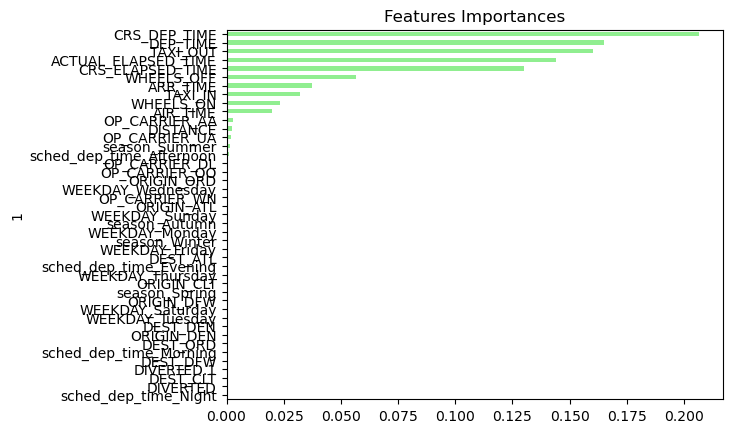

In [39]:
importances_df = pd.DataFrame(sorted(zip(gbt_tuned_2.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)